# Rock Paper Scissors - AI
## Model training

### Imports

In [1]:
#lib imports
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#local imports
from utils import *
from plotting import *
from model_creator import *

print('TensorFlow version: ', tf.__version__)
print('Keras version: ', keras.__version__)
print('Python version: ', os.sys.version)

TensorFlow version:  2.16.1
Keras version:  3.1.1
Python version:  3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 20:42:31) [MSC v.1937 64 bit (AMD64)]


### Dataset preprocessing

In [2]:
local_dir = './'
original_data_dir = os.path.join(local_dir, 'original_data')
dataset_dir = os.path.join(local_dir, 'dataset')
models_dir = os.path.join(local_dir, 'models')

if not os.path.exists(models_dir):
    os.makedirs(models_dir)

train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

if not os.path.exists(original_data_dir):
    raise FileNotFoundError('Original data directory not found')

classes = ['rock', 'paper', 'scissors']

if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)
    split_dataset(classes, original_data_dir, dataset_dir)

for path in [train_dir, val_dir, test_dir]:
    if not os.path.exists(path):
        raise FileNotFoundError(f'{path} not found')
    
    print(path)
    for class_name in classes:
        print(f'    - {class_name}: {len(os.listdir(os.path.join(path, class_name)))} images')
  

./dataset\train
    - rock: 580 images
    - paper: 569 images
    - scissors: 600 images
./dataset\val
    - rock: 73 images
    - paper: 71 images
    - scissors: 75 images
./dataset\test
    - rock: 73 images
    - paper: 72 images
    - scissors: 75 images


In [3]:
check_for_duplicates_in_dataset('./dataset')

No duplicates found in dataset
2188 files found in dataset


### Data augmentation

In [4]:
# Image target size
img_rows, img_cols = 224, 224

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_rows, img_cols),
    batch_size=32,
    class_mode='categorical')

val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_rows, img_cols),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_rows, img_cols),
    batch_size=32,
    class_mode='categorical')


Found 1749 images belonging to 3 classes.
Found 219 images belonging to 3 classes.
Found 220 images belonging to 3 classes.


### Model CNN

In [5]:
model_name = 'simple_cnn'
load_model_bool = False

model = create_simple_cnn_model(input_shape=(224, 224, 3), num_classes=3)

if load_model_bool:
    model = load_model(model_name, models_dir)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])
model.summary()

c:\Users\adria\anaconda3\envs\ML\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    11,944,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,963,587 (45.64 MB)

 Trainable params: 11,963,587 (45.64 MB)

 Non-trainable params: 0 (0.00 B)

### Training

In [6]:
epochs = 60

hist = model.fit(
      train_generator,
      epochs=epochs,
      validation_data=val_generator)


Epoch 1/60


c:\Users\adria\anaconda3\envs\ML\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 378ms/step - acc: 0.3445 - loss: 1.0937 - val_acc: 0.5205 - val_loss: 1.0578
Epoch 2/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 22s 371ms/step - acc: 0.4576 - loss: 1.0564 - val_acc: 0.3973 - val_loss: 1.0450
Epoch 3/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 22s 373ms/step - acc: 0.4655 - loss: 1.0275 - val_acc: 0.5936 - val_loss: 0.9954
Epoch 4/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 22s 376ms/step - acc: 0.4871 - loss: 1.0153 - val_acc: 0.6073 - val_loss: 0.9682
Epoch 5/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 385ms/step - acc: 0.5215 - loss: 0.9910 - val_acc: 0.5525 - val_loss: 0.9719
Epoch 6/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 387ms/step - acc: 0.5074 - loss: 1.0002 - val_acc: 0.6438 - val_loss: 0.9230
Epoch 7/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 395ms/step - acc: 0.5273 - loss: 0.9784 - val_acc: 0.6712 - val_loss: 0.9039
Epoch 8/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 389ms/step - acc: 0.5335 - loss: 0.9646 - val_acc: 0.6667 - val_loss: 0.8993
Epoch 9/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 385ms/step - acc:

In [7]:
save = True
if save:
    save_model(model, model_name, models_dir, history=hist.history)

Model saved in ./models\simple_cnn.h5
History saved in ./models\simple_cnn_history.pkl


<Figure size 640x480 with 0 Axes>

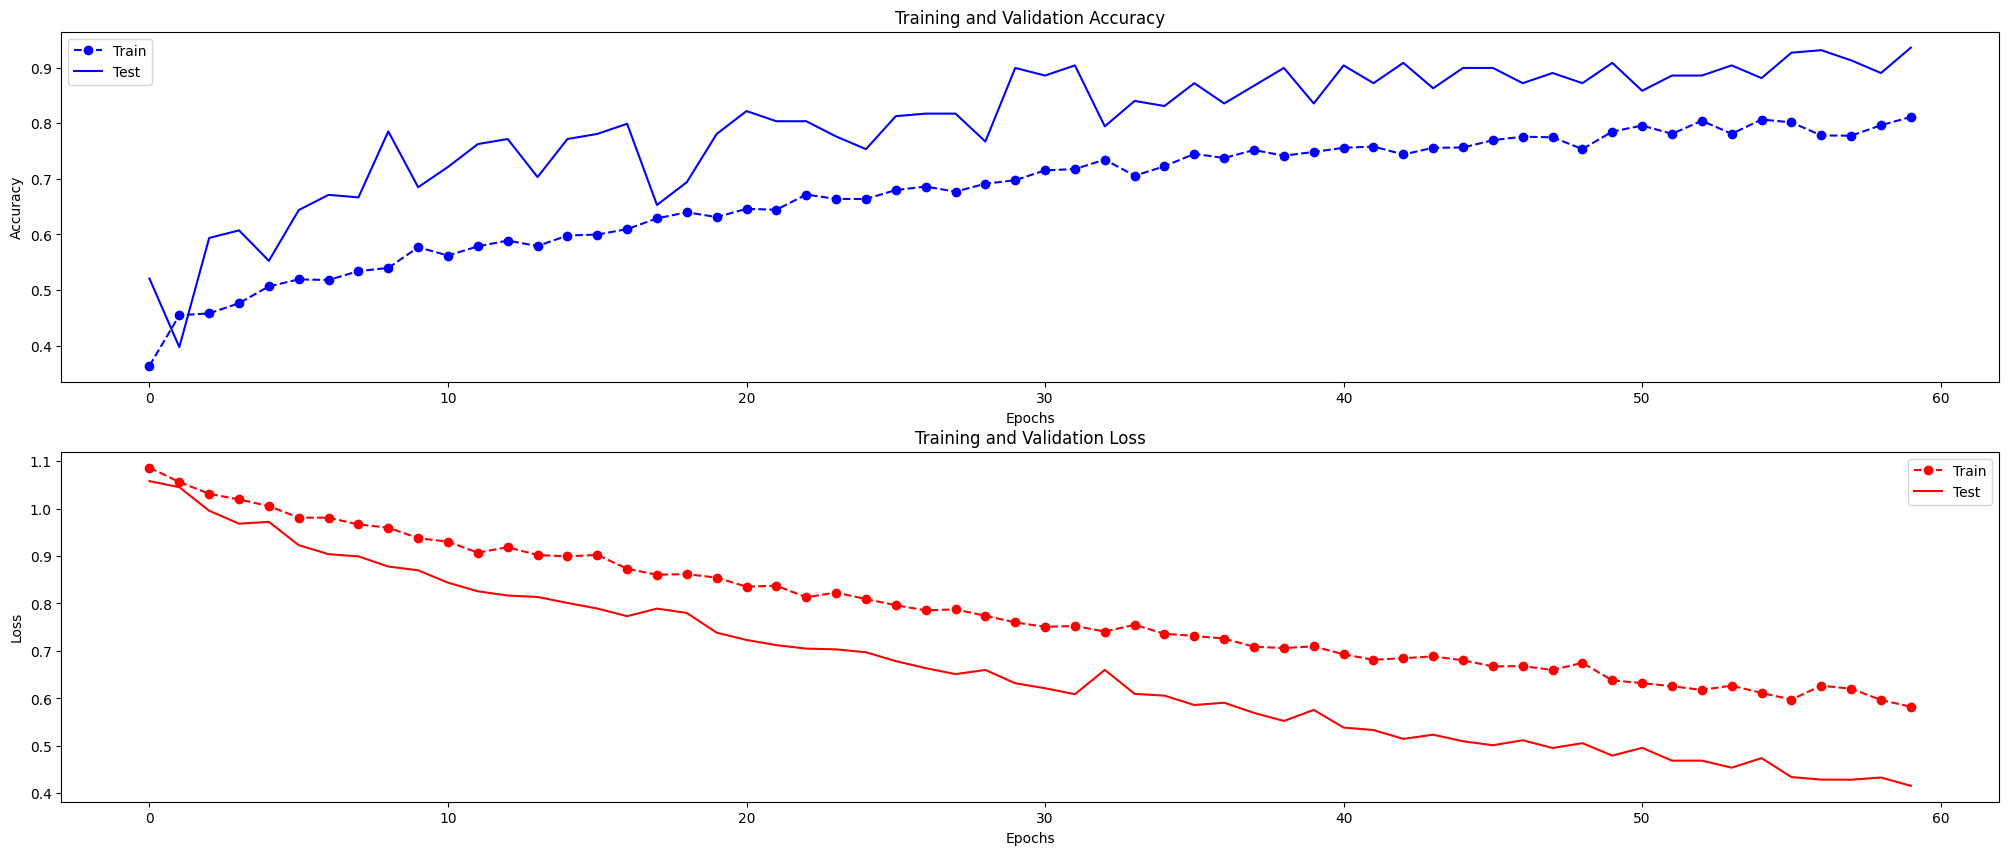

In [8]:
plot_accuracy_and_loss(hist.history)

In [ ]:
hist_dict = compile_and_train_model(
    create_model_func=create_simple_cnn_model_reguliarized,
    create_model_args={'input_shape' : (224, 224, 3), 'num_classes' :3},
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['acc'], 
    train_generator=train_generator,
    val_generator=val_generator,
    epochs=100,
    models_dir='./models',
    model_name='cnn_reguliarized',
)

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 55s 933ms/step - acc: 0.4887 - loss: 1.7911 - val_acc: 0.3333 - val_loss: 1.8562
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 53s 936ms/step - acc: 0.7114 - loss: 1.2218 - val_acc: 0.3333 - val_loss: 2.7691
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 55s 964ms/step - acc: 0.7648 - loss: 1.0987 - val_acc: 0.3333 - val_loss: 3.7880
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 55s 971ms/step - acc: 0.8093 - loss: 1.0309 - val_acc: 0.3333 - val_loss: 4.3594
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 52s 927ms/step - acc: 0.8418 - loss: 0.9326 - val_acc: 0.3333 - val_loss: 4.7823
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - acc: 0.8658 - loss: 0.8908 - val_acc: 0.3333 - val_loss: 4.9977
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - acc: 0.8699 - loss: 0.8756 - val_acc: 0.3333 - val_loss: 5.4094
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - acc: 0.8770 - loss: 0.8462 - val_acc: 0.3333 - val_loss: 5.0480
Epoch 9/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 51s 900ms/

In [ ]:
plot_accuracy_and_loss(hist_dict)